<a href="https://colab.research.google.com/github/adityamulik/INFO-6105---Data-Science-Engineering-And-Tools/blob/main/Final_Project/Spotify_Music_Prediction_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to INFO 6105 - Data Science Engineering Methods & Tools (Final Project)

## Topic: Spotify Music Predicition using KNN Classifier ML Model

### Professor:
> Ramkumar Hariharan

### Team Members:
1. Aditya Mulik
2. Tushar Kurhekar

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import os 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading dataset from Google Drive
Dataset: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv

In [2]:
# Load Data from Google Drive
drive.mount('/content/drive')
csvFile = open('/content/drive/MyDrive/dataset_INFO6105/tracks.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Data
data = pd.read_csv(csvFile)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

### Data Analysis

In [4]:
data.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
data.shape

(586672, 20)

In [6]:
data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [7]:
pd.DataFrame(data.dtypes, columns=['DataType'])

,DataType
id,object
name,object
popularity,int64
duration_ms,int64
explicit,int64
artists,object
id_artists,object
release_date,object
danceability,float64
energy,float64


In [8]:
data[['danceability', 'energy', 'tempo']].describe()

,danceability,energy,tempo
count,586672.000000,586672.000000,586672.000000
mean,0.563594,0.542036,118.464857
std,0.166103,0.251923,29.764108
min,0.000000,0.000000,0.000000
25%,0.453000,0.343000,95.600000
50%,0.577000,0.549000,117.384000
75%,0.686000,0.748000,136.321000
max,0.991000,1.000000,246.381000


In [9]:
data['time_signature'].unique()

array([3, 1, 5, 4, 0])

In [10]:
data['loudness'].unique()

array([-13.338, -22.136, -21.18 , ..., -29.059, -28.573, -25.551])

In [11]:
data['popularity'].unique()

array([  6,   0,   1,   4,  41,  38,  30,  28,  27,  26,  25,  23,  22,
        20,  18,  17,  16,  15,  14,  11,  10,   8,   9,   5,   7,   2,
        39,  33,  32,  24,  21,  19,  13,  12,   3,  51,  48,  40,  34,
        29,  47,  43,  37,  35,  31,  55,  50,  36,  42,  65,  53,  45,
        49,  46,  44,  52,  56,  54,  61,  62,  57,  69,  58,  68,  60,
        64,  63,  67,  66,  59,  74,  71,  77,  70,  79,  75,  73,  72,
        80,  78,  76,  82,  83,  84,  81,  86,  85,  87,  90,  88,  89,
        94,  92,  97,  96,  95,  93,  91, 100,  99,  98])

In [12]:
data.sort_values(by='popularity', ascending=False).head(15)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


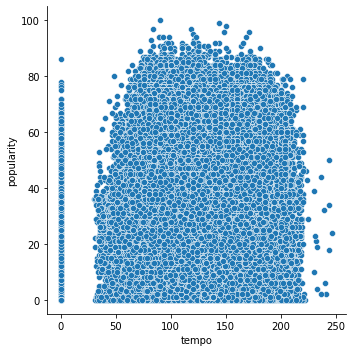

In [13]:
sns.relplot(x="tempo", y="popularity", data=data)

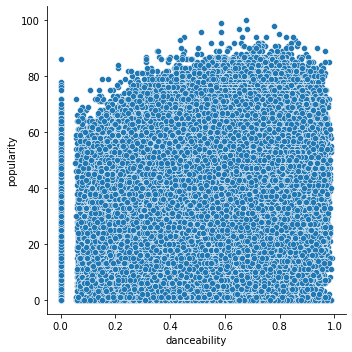

In [14]:
sns.relplot(x="danceability", y="popularity", data=data)

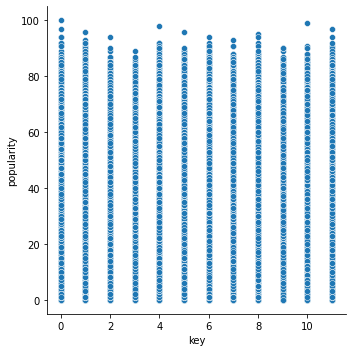

In [15]:
sns.relplot(x="key", y="popularity", data=data)

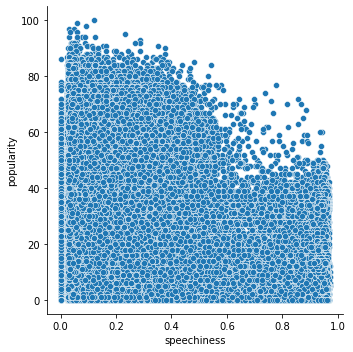

In [16]:
sns.relplot(x="speechiness", y="popularity", data=data)

In [17]:
# sns.pairplot(data, vars=['tempo', 'popularity', 'valence', 'energy', 'speechiness', 'danceability', 'acousticness'])

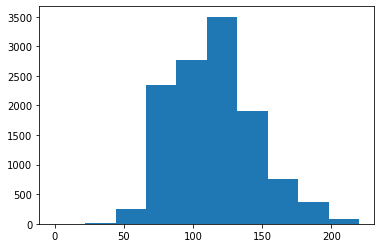

In [18]:
data[data['popularity'] == 1]['tempo'].hist(grid=False, bins=10)

In [19]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [20]:
pd.isnull(data).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [21]:
null_data = data[data.isnull().any(axis=1)]
print(null_data)

                            id name  popularity  duration_ms  explicit  \
226336  4iH7negBYMfj2z0wDNmgdx  NaN          28       264973         0   
510975  04d5kbLvSAIBt3pGcljdhC  NaN           0       184293         0   
510976  05tRkgyxVdwMePGqOXMDYU  NaN           0       191587         0   
510978  0YAMRgAQH6tkTh4sWNXr8L  NaN           0       191573         0   
510979  1K6MQQxmFpPb66ZnaiIpHX  NaN           0       167602         0   
...                        ...  ...         ...          ...       ...   
517206  6OH9mz9aFbGlbf74cBwYWD  NaN           2       209760         0   
517215  15RqFDA86slfzujSQMEX4i  NaN           2       257280         0   
520127  0hKA9A2JPtFdg0fiMhyjQD  NaN           6       194081         0   
525238  1kR4gIb7nGxHPI3D2ifs59  NaN          26       289440         0   
525265  4xyBq8t4nkUKH8s28j6ZoD  NaN          24       254000         0   

       artists                  id_artists release_date  danceability  energy  \
226336    ['']  ['0LyfQWJT6nXa

In [22]:
data.dropna(inplace = True)

In [23]:
pd.isnull(data).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

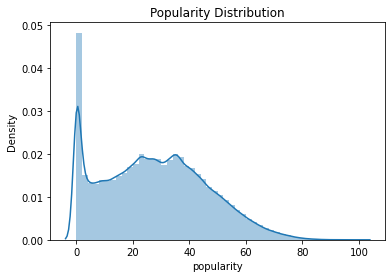

In [24]:
sns.distplot(data['popularity']).set_title('Popularity Distribution')

In [25]:
data.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.027638,0.211749,0.186878,0.302178,0.015306,0.327001,-0.033652,-0.047415,-0.370723,-0.236403,-0.048735,0.004558,0.071223,0.086713
duration_ms,0.027638,1.000000,-0.016753,-0.120411,0.024782,0.004625,0.000314,-0.027604,-0.125783,-0.064394,0.069327,0.002139,-0.163233,-0.001249,0.037553
explicit,0.211749,-0.016753,1.000000,0.150216,0.123060,0.010933,0.134598,-0.051757,0.102251,-0.149001,-0.067510,-0.013113,-0.016551,0.005723,0.044442
danceability,0.186878,-0.120411,0.150216,1.000000,0.241464,0.018837,0.251394,-0.044726,0.199291,-0.242838,-0.225831,-0.106175,0.528136,-0.040896,0.146166
energy,0.302178,0.024782,0.123060,0.241464,1.000000,0.036303,0.764744,-0.065238,-0.053560,-0.715366,-0.195727,0.124636,0.372224,0.230006,0.188971
key,0.015306,0.004625,0.010933,0.018837,0.036303,1.000000,0.027106,-0.129495,-0.001034,-0.027427,-0.006788,-0.006763,0.019998,0.004912,0.008871
loudness,0.327001,0.000314,0.134598,0.251394,0.764744,0.027106,1.000000,-0.040456,-0.167140,-0.519423,-0.329255,0.029509,0.275416,0.189252,0.164376
mode,-0.033652,-0.027604,-0.051757,-0.044726,-0.065238,-0.129495,-0.040456,1.000000,-0.017992,0.058914,-0.010023,0.007025,0.011494,0.007877,-0.015899
speechiness,-0.047415,-0.125783,0.102251,0.199291,-0.053560,-0.001034,-0.167140,-0.017992,1.000000,0.069121,-0.102425,0.207062,0.046481,-0.086950,-0.114211
acousticness,-0.370723,-0.064394,-0.149001,-0.242838,-0.715366,-0.027427,-0.519423,0.058914,0.069121,1.000000,0.204312,-0.004742,-0.180878,-0.195117,-0.173920


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


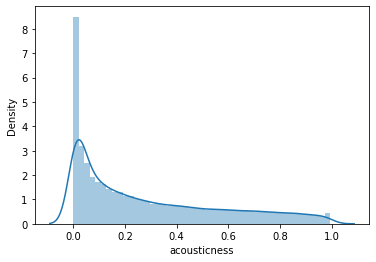

In [26]:
popular_greater_50 = data[data.popularity > 50]
sns.distplot(popular_greater_50['acousticness'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


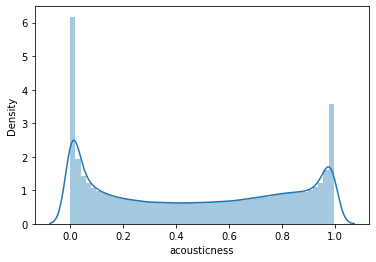

In [27]:
popular_less_50 = data[data.popularity < 50]
sns.distplot(popular_less_50['acousticness'])

In [28]:
data['duration_m'] = data['duration_ms']/60000
data = data.reindex(sorted(data.columns), axis=1)
data.head()

,acousticness,artists,danceability,duration_m,duration_ms,energy,explicit,id,id_artists,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,time_signature,valence
0,0.674,['Uli'],0.645,2.115050,126903,0.4450,0,35iwgR4jXetI318WEWsa1Q,['45tIt06XoI0Iio4LBEVpls'],0.7440,...,0.151,-13.338,1,Carve,6,1922-02-22,0.4510,104.851,3,0.127
1,0.797,['Fernando Pessoa'],0.695,1.636667,98200,0.2630,0,021ht4sdgPcrDgSk7JTbKY,['14jtPCOoNZwquk5wd9DxrY'],0.0000,...,0.148,-22.136,1,Capítulo 2.16 - Banquero Anarquista,0,1922-06-01,0.9570,102.009,1,0.655
2,0.994,['Ignacio Corsini'],0.434,3.027333,181640,0.1770,0,07A5yehtSnoedViJAZkNnc,['5LiOoJbxVSAMkBS2fUm3X2'],0.0218,...,0.212,-21.180,1,Vivo para Quererte - Remasterizado,0,1922-03-21,0.0512,130.418,5,0.457
3,0.995,['Ignacio Corsini'],0.321,2.948450,176907,0.0946,0,08FmqUhxtyLTn6pAh6bk45,['5LiOoJbxVSAMkBS2fUm3X2'],0.9180,...,0.104,-27.961,1,El Prisionero - Remasterizado,0,1922-03-21,0.0504,169.980,3,0.397
4,0.989,['Dick Haymes'],0.402,2.718000,163080,0.1580,0,08y9GfoqCWfOGsKdwojr5e,['3BiJGZsyX9sJchTqcSA7Su'],0.1300,...,0.311,-16.900,0,Lady of the Evening,0,1922,0.0390,103.220,4,0.196


In [29]:
data.drop('duration_ms', axis = 1, inplace = True)

In [30]:
data.describe()

,acousticness,danceability,duration_m,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
count,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,0.449803,0.563612,3.834248,0.542071,0.044091,0.113425,5.221594,0.213933,-10.205789,0.658797,27.573212,0.104870,118.467930,3.873410,0.552306
std,0.348812,0.166101,2.108880,0.251910,0.205298,0.266843,3.519420,0.184328,5.089422,0.474114,18.369417,0.179902,29.762942,0.473112,0.257673
min,0.000000,0.000000,0.055733,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096900,0.453000,2.918050,0.343000,0.000000,0.000000,2.000000,0.098300,-12.891000,0.000000,13.000000,0.034000,95.606000,4.000000,0.346000
50%,0.422000,0.577000,3.581783,0.549000,0.000000,0.000024,5.000000,0.139000,-9.242000,1.000000,27.000000,0.044300,117.387000,4.000000,0.564000
75%,0.784000,0.686000,4.397783,0.748000,0.000000,0.009550,8.000000,0.278000,-6.481000,1.000000,41.000000,0.076300,136.324000,4.000000,0.769000
max,0.996000,0.991000,93.686967,1.000000,1.000000,1.000000,11.000000,1.000000,5.376000,1.000000,100.000000,0.971000,246.381000,5.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      586601 non-null  float64
 1   artists           586601 non-null  object 
 2   danceability      586601 non-null  float64
 3   duration_m        586601 non-null  float64
 4   energy            586601 non-null  float64
 5   explicit          586601 non-null  int64  
 6   id                586601 non-null  object 
 7   id_artists        586601 non-null  object 
 8   instrumentalness  586601 non-null  float64
 9   key               586601 non-null  int64  
 10  liveness          586601 non-null  float64
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  name              586601 non-null  object 
 14  popularity        586601 non-null  int64  
 15  release_date      586601 non-null  object 
 16  speechiness       58

In [32]:
# Finding Outliers, where songs are larger than 60 minutes
data[data['duration_m']>60]

,acousticness,artists,danceability,duration_m,energy,explicit,id,id_artists,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,time_signature,valence
59432,0.976000,['Brian Eno'],0.0918,60.846667,0.056900,0,4t3Yh6tKkxXrc458pNI7zZ,['7MSUfLeTdDEoZiJPDSBXgi'],0.88400,0,0.0842,-31.808,1,Thursday Afternoon - 2005 Digital Remaster,39,1985-10-01,0.0358,81.944,3,0.0528
79965,0.006100,['Various Artists'],0.7530,72.800000,0.829000,0,4jcy1pM1HbnuqPqKlBnM6i,['0LyfQWJT6nXafLPZqxe9Of'],0.18300,1,0.0440,-6.797,1,The Best of Chillifunk Ten Years 1996-2006 (No...,0,2006-02-17,0.0417,127.280,4,0.7210
79967,0.006100,['Various Artists'],0.7530,72.800000,0.829000,0,0LfoartMBLZIQ4AHWBYdob,['0LyfQWJT6nXafLPZqxe9Of'],0.18300,1,0.0440,-6.797,1,The Best of Chillifunk Ten Years 1996-2006 (No...,0,1996,0.0417,127.280,4,0.7210
82551,0.000599,['Dj Emma'],0.7920,78.278167,0.742000,0,5EvdM8FjgviSxQCb2FuH1d,['0rhY5SJ2Re04pDcAbGKgo9'],0.83800,6,0.0930,-6.899,0,Happy New Year Mix 2009,1,2009-12-25,0.0520,128.001,4,0.2270
83471,0.584000,['Bishop Norman L. Wagner'],0.5180,70.582450,0.348000,0,3bhMyYMXkK89VAIB52rtjA,['14D23I203ITLC95b5ndqEh'],0.00000,1,0.5820,-22.459,1,2010 the Year of the Open Door,0,2010-01-03,0.9140,54.613,3,0.0860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546268,0.963000,"['William Johnstone', 'Steve Dunne', 'Nelson W...",0.6850,60.986783,0.331000,0,0GTX4MhBXrvJLGSSapeVdS,"['74YojzlNtuLkvb6KLIgmmf', '6UwN0BpPwGrm2GijDf...",0.00000,8,0.7830,-15.493,1,"Lux Radio Theater, The Man Who Came To Dinner ...",0,1950-03-27,0.9480,104.147,4,0.6190
564662,0.139000,['Einschlafmusik'],0.0000,60.185933,0.000020,0,0bK7dc3ymXNPntoJmkFTnk,['5QLzxDRFscNIKoWJgUdCmh'],0.45500,1,0.1230,-26.079,1,Braunes Rauschen oszillierend als Einschlafhil...,30,2013-01-30,0.0000,0.000,0,0.0000
566091,0.709000,['Bajka Muzyczna'],0.5810,60.143383,0.087100,0,1lgBc0keIyuVQdnoCdBiys,['5bnxS5RyPx8i1ZM4AK54rN'],0.00000,7,0.0709,-25.635,0,Opowieść o Praprasłoniu,12,1983-01-10,0.8870,86.723,4,0.4090
568269,0.102000,['Soothing White Noise for Relaxation'],0.0000,72.000467,0.000046,0,1NHBwKuLmmLXRSLNMkRlN6,['7ovU9nJ62sM3mWmsa5Wi8L'],0.00582,1,0.4430,-13.676,1,Calming Hair Dryer (Blow Dryer to Calm Your Baby),33,2010-10-06,0.0000,0.000,0,0.0000


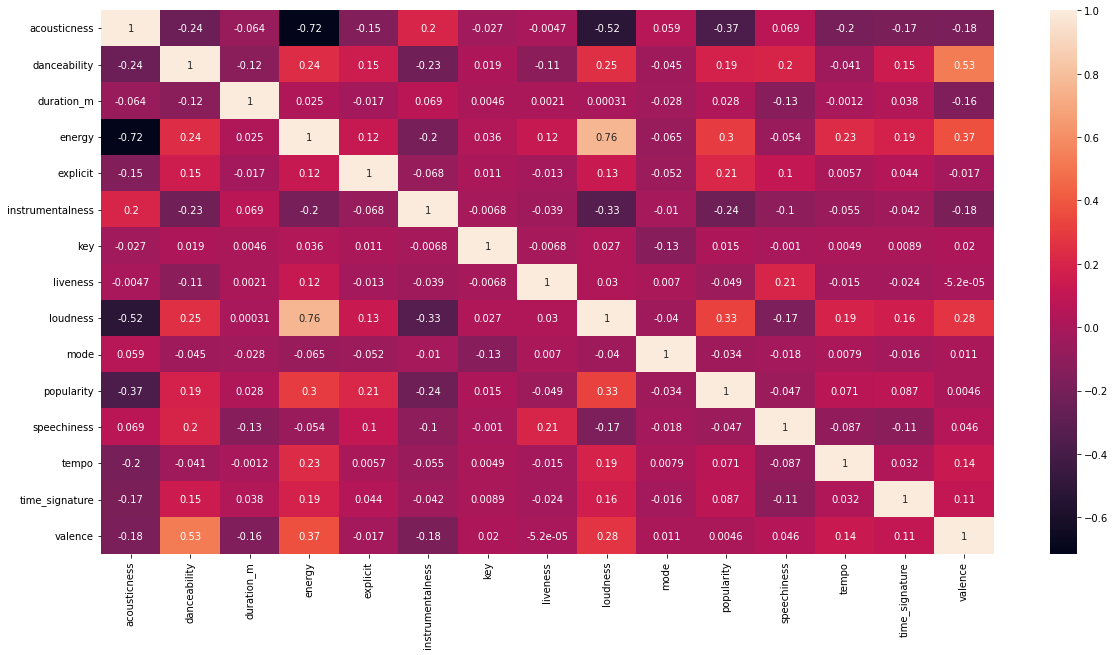

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),annot = True)

### Data Pre-Processing

In [34]:
data.head(15)

,acousticness,artists,danceability,duration_m,energy,explicit,id,id_artists,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,time_signature,valence
0,0.674,['Uli'],0.645,2.115050,0.4450,0,35iwgR4jXetI318WEWsa1Q,['45tIt06XoI0Iio4LBEVpls'],0.744000,0,0.1510,-13.338,1,Carve,6,1922-02-22,0.4510,104.851,3,0.1270
1,0.797,['Fernando Pessoa'],0.695,1.636667,0.2630,0,021ht4sdgPcrDgSk7JTbKY,['14jtPCOoNZwquk5wd9DxrY'],0.000000,0,0.1480,-22.136,1,Capítulo 2.16 - Banquero Anarquista,0,1922-06-01,0.9570,102.009,1,0.6550
2,0.994,['Ignacio Corsini'],0.434,3.027333,0.1770,0,07A5yehtSnoedViJAZkNnc,['5LiOoJbxVSAMkBS2fUm3X2'],0.021800,1,0.2120,-21.180,1,Vivo para Quererte - Remasterizado,0,1922-03-21,0.0512,130.418,5,0.4570
3,0.995,['Ignacio Corsini'],0.321,2.948450,0.0946,0,08FmqUhxtyLTn6pAh6bk45,['5LiOoJbxVSAMkBS2fUm3X2'],0.918000,7,0.1040,-27.961,1,El Prisionero - Remasterizado,0,1922-03-21,0.0504,169.980,3,0.3970
4,0.989,['Dick Haymes'],0.402,2.718000,0.1580,0,08y9GfoqCWfOGsKdwojr5e,['3BiJGZsyX9sJchTqcSA7Su'],0.130000,3,0.3110,-16.900,0,Lady of the Evening,0,1922,0.0390,103.220,4,0.1960
5,0.994,['Dick Haymes'],0.227,2.982217,0.2610,0,0BRXJHRNGQ3W4v9frnSfhu,['3BiJGZsyX9sJchTqcSA7Su'],0.247000,5,0.0977,-12.343,1,Ave Maria,0,1922,0.0382,118.891,4,0.0539
6,0.965,['Francis Marty'],0.510,2.241117,0.3550,0,0Dd9ImXtAtGwsmsAD69KZT,['2nuMRGzeJ5jJEKlfS7rZ0W'],0.000000,4,0.1550,-12.833,1,La Butte Rouge,0,1922,0.1240,85.754,5,0.7270
7,0.993,['Mistinguett'],0.563,2.690450,0.1840,0,0IA0Hju8CAgYfV1hwhidBH,['4AxgXfD7ISvJSTObqm4aIE'],0.000016,4,0.3250,-13.757,1,La Java,0,1922,0.0512,133.088,3,0.6540
8,0.620,['Greg Fieler'],0.488,5.167883,0.4750,0,0IgI1UCz84pYeVetnl1lGP,['5nWlsH5RDgFuRAiDeOFVmf'],0.006450,0,0.1070,-16.222,0,Old Fashioned Girl,0,1922,0.0399,139.952,4,0.5440
9,0.996,['Ignacio Corsini'],0.548,3.019550,0.0391,0,0JV4iqw2lSKJaHBQZ0e5zK,['5LiOoJbxVSAMkBS2fUm3X2'],0.933000,6,0.1480,-23.228,1,Martín Fierro - Remasterizado,0,1922-03-29,0.1530,75.595,3,0.6120


In [35]:
data = pd.get_dummies(data, columns=['time_signature', 'key', 'mode'], drop_first=True)

In [36]:
pd.options.display.max_columns = None

In [37]:
data.head()

,acousticness,artists,danceability,duration_m,energy,explicit,id,id_artists,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence,time_signature_1,time_signature_3,time_signature_4,time_signature_5,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0.674,['Uli'],0.645,2.115050,0.4450,0,35iwgR4jXetI318WEWsa1Q,['45tIt06XoI0Iio4LBEVpls'],0.7440,0.151,-13.338,Carve,6,1922-02-22,0.4510,104.851,0.127,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.797,['Fernando Pessoa'],0.695,1.636667,0.2630,0,021ht4sdgPcrDgSk7JTbKY,['14jtPCOoNZwquk5wd9DxrY'],0.0000,0.148,-22.136,Capítulo 2.16 - Banquero Anarquista,0,1922-06-01,0.9570,102.009,0.655,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.994,['Ignacio Corsini'],0.434,3.027333,0.1770,0,07A5yehtSnoedViJAZkNnc,['5LiOoJbxVSAMkBS2fUm3X2'],0.0218,0.212,-21.180,Vivo para Quererte - Remasterizado,0,1922-03-21,0.0512,130.418,0.457,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,0.995,['Ignacio Corsini'],0.321,2.948450,0.0946,0,08FmqUhxtyLTn6pAh6bk45,['5LiOoJbxVSAMkBS2fUm3X2'],0.9180,0.104,-27.961,El Prisionero - Remasterizado,0,1922-03-21,0.0504,169.980,0.397,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.989,['Dick Haymes'],0.402,2.718000,0.1580,0,08y9GfoqCWfOGsKdwojr5e,['3BiJGZsyX9sJchTqcSA7Su'],0.1300,0.311,-16.900,Lady of the Evening,0,1922,0.0390,103.220,0.196,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
features = ['acousticness', 'instrumentalness', 'loudness', 'energy']

In [39]:
X = data[features]
y = data['popularity']

In [40]:
pd.cut(data['popularity'], bins=3)

0           (-0.1, 33.333]
1           (-0.1, 33.333]
2           (-0.1, 33.333]
3           (-0.1, 33.333]
4           (-0.1, 33.333]
                ...       
586667    (33.333, 66.667]
586668     (66.667, 100.0]
586669     (66.667, 100.0]
586670    (33.333, 66.667]
586671    (33.333, 66.667]
Name: popularity, Length: 586601, dtype: category
Categories (3, interval[float64, right]): [(-0.1, 33.333] < (33.333, 66.667] < (66.667, 100.0]]

In [41]:
pd.cut(data['popularity'], bins=3, labels = ["low", "medium", "high"]).value_counts()

low       362562
medium    212672
high       11367
Name: popularity, dtype: int64

In [42]:
data['popularity'] = pd.cut(data.popularity, bins=3, labels = ["low", "medium", "high"], right = True)

In [43]:
data.head(100)

,acousticness,artists,danceability,duration_m,energy,explicit,id,id_artists,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence,time_signature_1,time_signature_3,time_signature_4,time_signature_5,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0.674,['Uli'],0.645,2.115050,0.4450,0,35iwgR4jXetI318WEWsa1Q,['45tIt06XoI0Iio4LBEVpls'],0.7440,0.151,-13.338,Carve,low,1922-02-22,0.4510,104.851,0.127,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.797,['Fernando Pessoa'],0.695,1.636667,0.2630,0,021ht4sdgPcrDgSk7JTbKY,['14jtPCOoNZwquk5wd9DxrY'],0.0000,0.148,-22.136,Capítulo 2.16 - Banquero Anarquista,low,1922-06-01,0.9570,102.009,0.655,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.994,['Ignacio Corsini'],0.434,3.027333,0.1770,0,07A5yehtSnoedViJAZkNnc,['5LiOoJbxVSAMkBS2fUm3X2'],0.0218,0.212,-21.180,Vivo para Quererte - Remasterizado,low,1922-03-21,0.0512,130.418,0.457,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,0.995,['Ignacio Corsini'],0.321,2.948450,0.0946,0,08FmqUhxtyLTn6pAh6bk45,['5LiOoJbxVSAMkBS2fUm3X2'],0.9180,0.104,-27.961,El Prisionero - Remasterizado,low,1922-03-21,0.0504,169.980,0.397,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.989,['Dick Haymes'],0.402,2.718000,0.1580,0,08y9GfoqCWfOGsKdwojr5e,['3BiJGZsyX9sJchTqcSA7Su'],0.1300,0.311,-16.900,Lady of the Evening,low,1922,0.0390,103.220,0.196,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.987,['Félix Mayol'],0.716,2.526217,0.3010,0,4CjnVzvSu86vqI5gY8SjPx,['7DIlOK9L8d0IQ7Xk8aJxDW'],0.0000,0.277,-14.070,Elle Vendait Des P'tits Gateaux,low,1922,0.1050,129.153,0.969,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
96,0.994,"['Dick Haymes', 'Victor Young', 'His Orchestra']",0.279,2.614667,0.1280,0,4DE7VBCgyTjqV0Plc9Ra0U,"['3BiJGZsyX9sJchTqcSA7Su', '3HqN7Sq7rmpOEI9UV5...",0.6130,0.116,-19.793,Hush-A-Bye (Wee Rose of Kilarney),low,1922,0.0406,79.121,0.145,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
97,0.520,['Fernando Pessoa'],0.714,1.620000,0.2190,0,4FCWuuqM851ACz8p1b41fi,['14jtPCOoNZwquk5wd9DxrY'],0.0000,0.222,-21.185,Capítulo 2.23 - Banquero Anarquista,low,1922-06-01,0.9540,110.822,0.540,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
98,0.996,['Ignacio Corsini'],0.541,2.684667,0.1610,0,4RR5RKLA2vTQxkWrMIeHem,['5LiOoJbxVSAMkBS2fUm3X2'],0.9070,0.129,-21.250,Cap Polonio - Remasterizado,low,1922-03-21,0.0940,143.105,0.708,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [44]:
data.loc[data['popularity']== 'high']

,acousticness,artists,danceability,duration_m,energy,explicit,id,id_artists,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence,time_signature_1,time_signature_3,time_signature_4,time_signature_5,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
22549,0.994,"['Erik Satie', 'Philippe Entremont']",0.469,3.431117,0.0128,0,5NGtFXVpXSvwunEIGeviY3,"['459INk8vcC0ebEef82WjIK', '4x2fCu6MNErew0pb64...",0.937000,0.0941,-36.856,Gymnopédie No. 1,high,1949,0.1190,72.765,0.3540,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
27499,0.920,['Nat King Cole'],0.349,3.199550,0.1820,0,648TTtYB0bH0P8Hfy0FmkL,['7v4imS0moSyGdXyLgVTIV7'],0.015200,0.1430,-13.507,Unforgettable,high,1954-01-01,0.0310,136.094,0.1780,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
29498,0.452,['Frank Sinatra'],0.585,3.729333,0.2470,0,3aEJMh1cXKEjgh52claxQp,['1Mxqyy3pSjf8kZZL4QVxS0'],0.000009,0.1070,-12.612,I've Got You Under My Skin - Remastered 1998,high,1956-03,0.0400,127.150,0.5910,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
29499,0.982,['Billie Holiday'],0.639,3.463783,0.2690,0,1pZn8AX1WulW8IO338hE5D,['1YzCsTRb22dQkh9lghPIrp'],0.120000,0.1410,-11.435,Blue Moon,high,1956-01-01,0.0698,124.866,0.5390,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
30498,0.913,"['Ella Fitzgerald', 'Louis Armstrong']",0.443,3.086000,0.1040,0,78MI7mu1LV1k4IA2HzKmHe,"['5V0MlUE1Bft0mbLlND7FJz', '19eLuQmk9aCobbVDHc...",0.000000,0.1910,-17.042,Dream A Little Dream Of Me - Single Version,high,1957-01-01,0.1010,76.497,0.3940,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586650,0.845,['Clinton Kane'],0.493,3.313317,0.4610,0,1uviKYHZuM4uINK33F7sCt,['7okSU80WTrn4LXlyXYbX3P'],0.000000,0.1150,-8.524,Fix It to Break It,high,2020-03-27,0.0456,51.414,0.3500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
586657,0.996,['Laureen Conrad'],0.609,1.375000,0.0172,0,1dKxf4Ht2SsKLyXfSDJAgy,['7vgGpuiXdNlCmc994PlMlz'],0.973000,0.1080,-28.573,The Cutest Puppy,high,2020-10-30,0.1180,68.619,0.8900,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
586661,0.618,['Clinton Kane'],0.590,3.372583,0.4430,0,27kcZEJvhkb1rzZS9gCpdA,['7okSU80WTrn4LXlyXYbX3P'],0.000000,0.1100,-5.662,remember the mornings,high,2020-11-27,0.0722,149.447,0.3420,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
586668,0.141,['ROLE MODEL'],0.765,2.554883,0.6630,0,0NuWgxEp51CutD2pJoF4OM,['1dy5WNgIKQU6ezkpZs4y8z'],0.000297,0.0924,-5.223,blind,high,2020-10-21,0.0652,150.091,0.6860,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
y = data.popularity
y.value_counts()/y.count()

low       0.618073
medium    0.362550
high      0.019378
Name: popularity, dtype: float64

In [46]:
pop_count = data.popularity.value_counts()

In [47]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
print('Removed indexes:')
print(X_ros.shape, y_ros.shape)

Removed indexes:
(1087686, 4) (1087686,)


In [48]:
X_ros.value_counts()

acousticness  instrumentalness  loudness  energy
0.167000      0.000001          -3.434    0.7290    109
0.289000      0.000003          -4.282    0.8270    108
0.038700      0.003250          -3.553    0.9680    107
0.568000      0.000000          -6.825    0.5410    107
0.000079      0.000000          -3.956    0.8410    106
                                                   ... 
0.271000      0.057600          -10.456   0.8840      1
              0.057000          -14.000   0.2710      1
              0.052300          -7.304    0.6060      1
              0.050900          -10.862   0.7100      1
0.996000      0.993000          -28.469   0.0157      1
Length: 563685, dtype: int64

In [49]:
y_ros.value_counts()

low       362562
medium    362562
high      362562
Name: popularity, dtype: int64

In [50]:
feature_cols = ['acousticness', 'instrumentalness', 'loudness', 'energy']
X = data[feature_cols]

In [51]:
X_ros.head()

,acousticness,instrumentalness,loudness,energy
0,0.674,0.7440,-13.338,0.4450
1,0.797,0.0000,-22.136,0.2630
2,0.994,0.0218,-21.180,0.1770
3,0.995,0.9180,-27.961,0.0946
4,0.989,0.1300,-16.900,0.1580


In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(X_ros, y_ros)

KNeighborsClassifier(n_neighbors=1)

### Model Training, train-test-val split

We have split the data into train, test and validation dataset by splitting the data in 70-15-15 format



In [54]:
y_pred_class = knn.predict(X_ros)

In [55]:
# Overfitting as 98% is too good to be a score
print(metrics.accuracy_score(y_ros, y_pred_class))

0.9867093995877487


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=99, test_size=0.15)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_val)
print(metrics.accuracy_score(y_val, y_pred_class))

0.8093308335736948


In [57]:
k_range2 = range(1, 22)
param_dist = dict(n_neighbors=k_range2)

### Hyperparameter Tuning
Imputation using RandomizedSearchCV

In [58]:
rand = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=5)

In [59]:
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
                   n_iter=5, param_distributions={'n_neighbors': range(1, 22)},
                   random_state=5, scoring='accuracy')

In [60]:
# examining the best model
print(rand.best_score_) 
print(rand.best_params_) 
print(rand.best_estimator_)

0.7478383371448665
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


### Confusion Matrix

In [61]:
cmat = confusion_matrix(y_val, y_pred_class)
print('True Negative {}'.format(cmat[0,0]))
print('Flase Positive {}'.format(cmat[0,1]))
print('False Negative {}'.format(cmat[1,0]))
print('True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat)))) 
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

True Negative 45925
Flase Positive 46
False Negative 792
True Positive 30566
Accuracy Score: 0.8093308335736948
Misclassification Rate: 0.19066916642630516


### Model Accuracy on Test Data

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)

In [63]:
metrics.accuracy_score(y_test, y_pred_class)

0.7600657051969624